<a href="https://colab.research.google.com/github/TonyStone23/Summer_Research_2025/blob/main/weekTwo/Gradient%20Descent/GradientDescentTwoFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:

# Gather Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr

# Random state
randomState = 10

In [354]:
X, y = mr(50, 2, noise = 1, random_state = randomState)

In [355]:
X1 = X[:,0].reshape(-1,1)
X2 = X[:,1].reshape(-1,1)
y = y.reshape(-1,1)

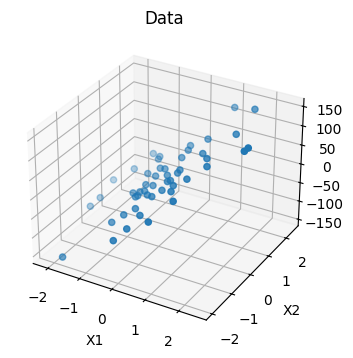

In [356]:
# Visualize data:
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X1, X2, y, )
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.title("Data")
plt.show()

In [357]:
# Initialize
w1 = 0.0
w2 = 0.0
bias = 0.0
lr = .01
epochs = 500
n = len(X)
mse = []

In [358]:
# Parameter history
w1_history = []
w2_history = []
bias_history = []

In [359]:
# Training loop
for epoch in range(epochs):
  y_pred = (w1 * X1) + (w2 * X2) + bias
  error = y_pred - y
  mse.append((error**2).mean())

  dw1 = (2/n) * (X1.T @ error)
  dw2 = (2/n) * (X2.T @ error)

  db = (2/n) * error.sum()

  w1 -= lr * dw1
  w2 -= lr * dw2
  bias -= lr * db

  w1_history.append(w1.item())
  w2_history.append(w2.item())
  bias_history.append(bias)

print('Trained Model:')
print(f'W1 = {w1} | W2 = {w2} | bias = {bias}')
print(f"MSE = {mse[-1]}")

Trained Model:
W1 = [[51.35044335]] | W2 = [[29.62147757]] | bias = 0.20250249058671205
MSE = 0.8327408564281672


In [360]:
w1_history = np.array(w1_history)
w2_history = np.array(w2_history)

print(w1_history[0], w1_history[-1])

1.1253027224087853 51.350443348857915


In [361]:
"""w1_vals = np.linspace(w1_history.min() - 1, w1_history.max() + 1, 50)
w2_vals = np.linspace(w2_history.min() - 1, w2_history.max() + 1, 50)"""

w1_vals = np.linspace(0, w1 * 2, 50)
w2_vals = np.linspace(0, w2 * 2, 50)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

In [362]:
Z = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        preds = W1[i, j] * X1 + W2[i, j] * X2 + bias
        Z[i, j] = ((preds - y) ** 2).mean()

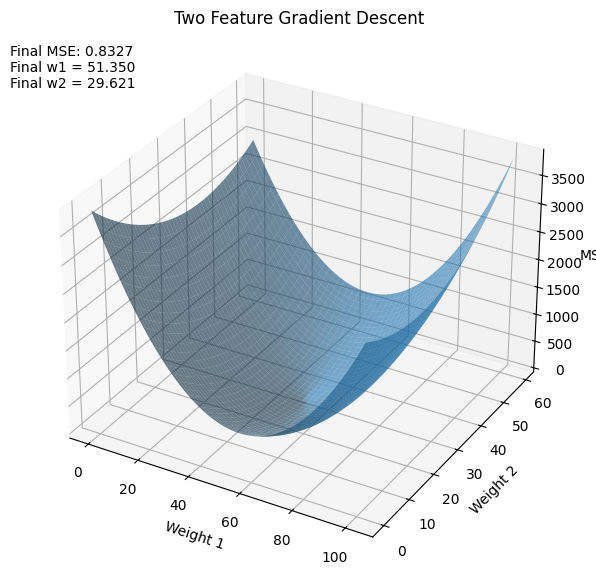

In [363]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(W1, W2, Z, alpha=0.6)
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('MSE')
plt.title("Two Feature Gradient Descent")
fig.text(.1, .8, f"Final MSE: {mse[-1]:.4f} \nFinal w1 = {w1[-1, -1]:.3f}\nFinal w2 = {w2[-1, -1]:.3f}")
plt.show()

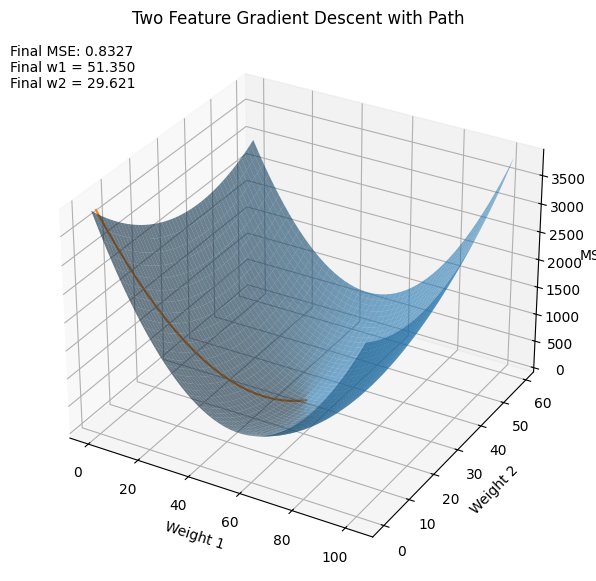

In [364]:
# Plot showing gradient history
costPath = np.array(mse)

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(W1, W2, Z, alpha=0.6)
ax.plot(w1_history, w2_history, costPath)
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('MSE')
plt.title("Two Feature Gradient Descent with Path")
fig.text(.1, .8, f"Final MSE: {mse[-1]:.4f} \nFinal w1 = {w1[-1, -1]:.3f}\nFinal w2 = {w2[-1, -1]:.3f}")
plt.show()